<a href="https://colab.research.google.com/github/Ana-dg/Book-Recommendation-System/blob/main/Probability_Programming_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.sparse import coo_matrix
import pymc as pm
import arviz as az
import seaborn as sns
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error

books = pd.read_csv("/content/Books.csv")
ratings = pd.read_csv("/content/Ratings.csv")
users = pd.read_csv("/content/Users.csv")

drop_books_df = ['Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
books.drop(columns=drop_books_df, inplace=True)
df = ratings.merge(books, how='left', on='ISBN')
df = df.merge(users[['User-ID', 'Age','Location']], how='left', on='User-ID')

missing_values = df.isnull().sum()
duplicate_rows = df[df.duplicated()]
numerical_columns = df.select_dtypes(include='number').columns
outliers = df[numerical_columns].describe(percentiles=[0.25, 0.75]).transpose()
unique_values = df.nunique()


print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:\n", duplicate_rows)
print("\nOutliers:\n", outliers)
print("\nUnique Values:\n", unique_values)
df.dropna(inplace=True)

# top 10 authors and the books written by the authors
author_counts = books.groupby('Book-Author')['Book-Title'].count()
sorted_authors = author_counts.sort_values(ascending=False)
top_10_authors = sorted_authors.head(10)
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar')
plt.title('Top 10 Authors by Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# top 10 book titles
book_title_counts = books['Book-Title'].value_counts()
top_10_titles = book_title_counts.head(10)
plt.figure(figsize=(12, 6))
ax = top_10_titles.plot(kind='barh')
ax.invert_yaxis()
plt.title('Top 10 Book Titles')
plt.tight_layout()
plt.show()

#remove noise
ratings_count = df.groupby('ISBN')['Book-Rating'].count()
threshold_percentile = 75
threshold = ratings_count.quantile(threshold_percentile / 100)
popular_books = ratings_count[ratings_count >= threshold].index
filtered_df = df[df['ISBN'].isin(popular_books)]
print(f"Rating threshold (75th percentile): {threshold}")
print(f"Original dataset size: {df.shape}")
print(f"Filtered dataset size: {filtered_df.shape}")
#Sanity 10 users 10 items
# Popularity-based sampling
user_popularity = df.groupby('User-ID').size().sort_values(ascending=False)
book_popularity = df.groupby('Book-Title').size().sort_values(ascending=False)
selected_users_popularity = user_popularity.head(200).index.tolist()
selected_books_popularity = book_popularity.head(200).index.tolist()
# Stratified sampling based on age and location
stratified_sample = df.groupby(['Age','Location']).apply(lambda x: x.sample(frac=0.1))
selected_users_stratified = stratified_sample['User-ID'].unique()[:200]
selected_books_stratified = stratified_sample['Book-Title'].unique()[:200]
selected_users = list(set(selected_users_popularity) | set(selected_users_stratified))
selected_books = list(set(selected_books_popularity) | set(selected_books_stratified))
#Model training
user_item_coo = user_item_csr.tocoo()
rows, cols = user_item_coo.row, user_item_coo.col
print(f"Length of rows, cols, and data: {len(rows)}, {len(cols)}, {len(user_item_coo.data)}")
with pm.Model() as model:
     # User activity level
    activity_shape = pm.Gamma('activity_shape', alpha=a_prime, beta=b_prime)
    activity_rate = pm.Gamma('activity_rate', alpha=a_prime, beta=b_prime)
    activity = pm.Gamma('activity', alpha=activity_shape, beta=activity_rate, shape=len(user_id_lookup))

    # Item popularity
    popularity_shape = pm.Gamma('popularity_shape', alpha=c_prime, beta=d_prime)
    popularity_rate = pm.Gamma('popularity_rate', alpha=c_prime, beta=d_prime)
    popularity = pm.Gamma('popularity', alpha=popularity_shape, beta=popularity_rate, shape=len(isbn_lookup))

    # User preferences and item attributes
    theta = pm.Gamma('theta', alpha=a, beta=activity[:, None], shape=(len(user_id_lookup), n_components))
    beta = pm.Gamma('beta', alpha=c, beta=popularity[:, None], shape=(len(isbn_lookup), n_components))
     # Expected rate for Poisson distribution
    rate = pm.math.dot(theta, beta.T)

    print(f"Theta shape: {theta.shape}")
    print(f"Beta shape: {beta.shape}")
    print(f"Expected rate matrix shape: {(n_users, n_items)}")
    print(f"Length of observed data: {len(user_item_csr.data)}")
    print(f"Length of rows and cols: {len(rows)}, {len(cols)}")
    rate_flat = rate[rows, cols]
    observed_ratings = pm.Poisson('observed_ratings', mu=rate_flat, observed=user_item_coo.data)
with model:
    trace = pm.sample(1000, tune=500, target_accept=0.95)
with model:
    az.plot_trace(trace)
    summary = az.summary(trace)
    print(summary)
az.plot_autocorr(trace)
az.plot_energy(trace)
#Increase number of samples and number of iterations
with model:
    trace = pm.sample(3000, tune=800, target_accept=0.95)
az.plot_trace(trace)
az.plot_autocorr(trace)
az.plot_energy(trace)
#Sampling for the 200 users 200 items
# Popularity-based sampling
user_popularity = df.groupby('User-ID').size().sort_values(ascending=False)
book_popularity = df.groupby('Book-Title').size().sort_values(ascending=False)
selected_users_popularity = user_popularity.head(200).index.tolist()
selected_books_popularity = book_popularity.head(200).index.tolist()
# Stratified sampling based on age and location
stratified_sample = df.groupby(['Age','Location']).apply(lambda x: x.sample(frac=0.1))
selected_users_stratified = stratified_sample['User-ID'].unique()[:200]
selected_books_stratified = stratified_sample['Book-Title'].unique()[:200]
selected_users = list(set(selected_users_popularity) | set(selected_users_stratified))
selected_books = list(set(selected_books_popularity) | set(selected_books_stratified))
# Age Distribution
selected_users_data = df[df['User-ID'].isin(selected_users)]
plt.hist(selected_users_data['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Selected Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# Split the data into training and testing sets
train, test = train_test_split(df[(df['User-ID'].isin(selected_users)) & (df['Book-Title'].isin(selected_books))], test_size=0.2)
#Model training
train['User-ID'] = train['User-ID'].astype('category')
train['ISBN'] = train['ISBN'].astype('category')
user_id_lookup = {category: index for index, category in enumerate(train['User-ID'].cat.categories)}
isbn_lookup = {category: index for index, category in enumerate(train['ISBN'].cat.categories)}
n_users = len(user_id_lookup)
n_items = len(isbn_lookup)
train['user_index'] = train['User-ID'].map(user_id_lookup)
train['item_index'] = train['ISBN'].map(isbn_lookup)
user_item_matrix = coo_matrix((train['Book-Rating'], (train['user_index'], train['item_index'])),
                              shape=(len(user_id_lookup), len(isbn_lookup)))
user_item_csr = user_item_matrix.tocsr()
# Define hyperparameters
a_prime, b_prime = 0.3, 0.3
c_prime, d_prime = 0.3, 0.3
a, b = 0.3, 0.3
c, d = 0.3, 0.3
n_components = 5  # Number of components
non_zero_indices = user_item_csr.nonzero()
rows, cols = non_zero_indices
user_item_coo = user_item_csr.tocoo()
rows, cols = user_item_coo.row, user_item_coo.col
print(f"Length of rows, cols, and data: {len(rows)}, {len(cols)}, {len(user_item_coo.data)}")
with pm.Model() as model:
     # User activity level
    activity_shape = pm.Gamma('activity_shape', alpha=a_prime, beta=b_prime)
    activity_rate = pm.Gamma('activity_rate', alpha=a_prime, beta=b_prime)
    activity = pm.Gamma('activity', alpha=activity_shape, beta=activity_rate, shape=len(user_id_lookup))
    # Item popularity
    popularity_shape = pm.Gamma('popularity_shape', alpha=c_prime, beta=d_prime)
    popularity_rate = pm.Gamma('popularity_rate', alpha=c_prime, beta=d_prime)
    popularity = pm.Gamma('popularity', alpha=popularity_shape, beta=popularity_rate, shape=len(isbn_lookup))
    # User preferences and item attributes
    theta = pm.Gamma('theta', alpha=a, beta=activity[:, None], shape=(len(user_id_lookup), n_components))
    beta = pm.Gamma('beta', alpha=c, beta=popularity[:, None], shape=(len(isbn_lookup), n_components))
     # Expected rate for Poisson distribution
    rate = pm.math.dot(theta, beta.T)
    # Check dimensions
    print(f"Theta shape: {theta.shape}")
    print(f"Beta shape: {beta.shape}")
    print(f"Expected rate matrix shape: {(n_users, n_items)}")
    print(f"Length of observed data: {len(user_item_csr.data)}")
    print(f"Length of rows and cols: {len(rows)}, {len(cols)}")

    rate_flat = rate[rows, cols]
    observed_ratings = pm.Poisson('observed_ratings', mu=rate_flat, observed=user_item_coo.data)
with model:
    trace = pm.sample(3000, tune=800, step=pm.NUTS(target_accept=0.95),return_inferencedata=True)
    #Predictive analysis
with model:
    ppc = pm.sample_posterior_predictive(trace)
inference_data = az.convert_to_inference_data(obj=trace)
trace_df = inference_data.to_dataframe(include_coords=False, groups="posterior")
with model:
    az.plot_trace(trace)
    summary = az.summary(trace)
    print(summary)
az.plot_autocorr(trace)
az.plot_energy(trace)
#Predicted vs training
rmse = mean_squared_error(actual_ratings, predicted_ratings, squared=False)
mae = mean_absolute_error(actual_ratings, predicted_ratings)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
#Predicted vs test set
test['user_index'] = pd.Categorical(test['User-ID'], categories=df['User-ID'].cat.categories).codes
test['item_index'] = pd.Categorical(test['ISBN'], categories=df['ISBN'].cat.categories).codes
test['user_index'] = test['User-ID'].map(user_id_lookup)
test['item_index'] = test['ISBN'].map(isbn_lookup)
with model:
    ppc_test = pm.sample_posterior_predictive(trace)
    predicted_ratings_test = ppc_test["posterior_predictive"]['observed_ratings']
predicted_means_test_adjusted = np.mean(predicted_ratings_test, axis=0)
rmse_test = mean_squared_error(actual_ratings_test, predicted_means_test_adjusted, squared=False)
mae_test = mean_absolute_error(actual_ratings_test, predicted_means_test_adjusted)
print(f"Adjusted Test RMSE: {rmse_test}")
print(f"Adjusted Test MAE: {mae_test}")


150 training VS actual data

For 10 users sanity code

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

# Assuming you have a pandas DataFrame 'df' loaded from your dataset with columns 'User-ID', 'ISBN', and 'Book-Rating'.

# Convert the 'User-ID' and 'ISBN' to categorical data type to ensure we have a consistent way of referring to users and items.
df['User-ID'] = df['User-ID'].astype('category')
df['ISBN'] = df['ISBN'].astype('category')

# Create a lookup table to convert user IDs and ISBNs to integer indices.
user_id_lookup = {category: index for index, category in enumerate(df['User-ID'].cat.categories)}
isbn_lookup = {category: index for index, category in enumerate(df['ISBN'].cat.categories)}

# Map the user IDs and ISBNs to their respective indices.
df['user_index'] = df['User-ID'].map(user_id_lookup)
df['item_index'] = df['ISBN'].map(isbn_lookup)

# Create the user-item matrix as a sparse matrix to save memory.
user_item_matrix = coo_matrix((df['Book-Rating'], (df['user_index'], df['item_index'])),
                              shape=(len(user_id_lookup), len(isbn_lookup)))



correct code

In [ ]:
# Convert the CSR matrix back to COO format for easy indexing
user_item_coo = user_item_csr.tocoo()

# Extract the row and column indices for the non-zero entries
rows, cols = user_item_coo.row, user_item_coo.col

# Ensure consistent lengths
print(f"Length of rows, cols, and data: {len(rows)}, {len(cols)}, {len(user_item_coo.data)}")

with pm.Model() as model:
     # User activity level
    activity_shape = pm.Gamma('activity_shape', alpha=a_prime, beta=b_prime)
    activity_rate = pm.Gamma('activity_rate', alpha=a_prime, beta=b_prime)
    activity = pm.Gamma('activity', alpha=activity_shape, beta=activity_rate, shape=len(user_id_lookup))

    # Item popularity
    popularity_shape = pm.Gamma('popularity_shape', alpha=c_prime, beta=d_prime)
    popularity_rate = pm.Gamma('popularity_rate', alpha=c_prime, beta=d_prime)
    popularity = pm.Gamma('popularity', alpha=popularity_shape, beta=popularity_rate, shape=len(isbn_lookup))

    # User preferences and item attributes
    theta = pm.Gamma('theta', alpha=a, beta=activity[:, None], shape=(len(user_id_lookup), n_components))
    beta = pm.Gamma('beta', alpha=c, beta=popularity[:, None], shape=(len(isbn_lookup), n_components))
     # Expected rate for Poisson distribution
    rate = pm.math.dot(theta, beta.T)

    # Manually check dimensions
    print(f"Theta shape: {theta.shape}")
    print(f"Beta shape: {beta.shape}")
    print(f"Expected rate matrix shape: {(n_users, n_items)}")
    print(f"Length of observed data: {len(user_item_csr.data)}")
    print(f"Length of rows and cols: {len(rows)}, {len(cols)}")


    # Flatten the rate matrix to use only the non-zero entries
    rate_flat = rate[rows, cols]

    # Define the observed ratings
    observed_ratings = pm.Poisson('observed_ratings', mu=rate_flat, observed=user_item_coo.data)

# Fit the model using MCMC
with model:
    trace = pm.sample(1000, tune=500, target_accept=0.95)


Length of rows, cols, and data: 68, 68, 68
Theta shape: Shape.0
Beta shape: Shape.0
Expected rate matrix shape: (18, 23)
Length of observed data: 68
Length of rows and cols: 68, 68


In [ ]:
# Convert the trace to an inference data object
inference_data = az.convert_to_inference_data(obj=trace)

# Convert the inference data to a DataFrame
trace_df = inference_data.to_dataframe(include_coords=False, groups="posterior")

In [ ]:
import arviz as az

# Filter columns for theta and beta
theta_columns = [col for col in trace_df.columns if 'theta[' in col]
beta_columns = [col for col in trace_df.columns if 'beta[' in col]

# Reshape theta and beta into matrices
theta_matrix = trace_df[theta_columns].mean().values.reshape(n_users, n_factors)
beta_matrix = trace_df[beta_columns].mean().values.reshape(n_items, n_factors)


# Predict ratings
predicted_ratings = np.dot(theta_matrix, beta_matrix.T)

# Generate recommendations
recommendations = {}
for user_id in user_id_lookup:
    user_index = user_id_lookup[user_id]

    # Get the user's predicted ratings and already rated items
    user_ratings = predicted_ratings[user_index]
    rated_items = set(user_item_csr[user_index].nonzero()[1])

    # Recommendations are items with the highest predicted ratings that haven't been rated yet
    user_recommendations = [isbn for isbn, rating in sorted(enumerate(user_ratings), key=lambda x: x[1], reverse=True) if isbn not in rated_items]

    recommendations[user_id] = user_recommendations[:5]  # Top 5 recommendations

# Print recommendations for a specific user (replace USER_ID with an actual user ID)
print("Recommendations for User-ID USER_ID:", recommendations[126680])


Recommendations for User-ID USER_ID: [1, 6, 15, 11, 12]


In [ ]:
# Generate recommendations for Book-Titles
book_title_recommendations = {}
for user_id in user_id_lookup:
    user_index = user_id_lookup[user_id]

    # Get the user's predicted ratings and already rated items
    user_ratings = predicted_ratings[user_index]
    rated_items = set(user_item_csr[user_index].nonzero()[1])

    # Recommendations are items with the highest predicted ratings that haven't been rated yet
    user_recommendations = [isbn for isbn, rating in sorted(enumerate(user_ratings), key=lambda x: x[1], reverse=True) if isbn not in rated_items]

    # Map ISBNs to Book-Titles
    book_title_recommendations[user_id] = [df[df['ISBN'].cat.codes == isbn]['Book-Title'].values[0] if isbn in df['ISBN'].cat.codes.values else 'Title not found' for isbn in user_recommendations[:5]]  # Top 5 recommendations

# Print recommendations for a specific user (replace USER_ID with an actual user ID)
user_id_to_recommend = 126680  # Replace USER_ID with the desired user ID
print("Recommendations for User-ID", user_id_to_recommend, ":", book_title_recommendations[user_id_to_recommend])

Recommendations for User-ID 126680 : ['On the Road (Essential.penguin S.)', 'The Nanny Diaries: A Novel', 'The Secret Life of Bees', 'A Painted House', "Kristy's Great Idea (Baby-Sitters Club, 1)"]


In [ ]:
# List of user IDs for which you want to get recommendations
user_ids_to_recommend = [230522, 204864, 110973]  # Replace with your desired user IDs

# Generate recommendations for Book-Titles for each user in the list
for user_id_to_recommend in user_ids_to_recommend:
    if user_id_to_recommend in book_title_recommendations:
        recommendations = book_title_recommendations[user_id_to_recommend]
        print("Recommendations for User-ID", user_id_to_recommend, ":")
        for i, book_title in enumerate(recommendations, start=1):
            print(f"{i}. {book_title}")
    else:
        print("No recommendations found for User-ID", user_id_to_recommend)


Recommendations for User-ID 230522 :
1. On the Road (Essential.penguin S.)
2. The Nanny Diaries: A Novel
3. The Secret Life of Bees
4. A Painted House
5. Kristy's Great Idea (Baby-Sitters Club, 1)
Recommendations for User-ID 204864 :
1. On the Road (Essential.penguin S.)
2. The Nanny Diaries: A Novel
3. The Secret Life of Bees
4. A Painted House
5. Kristy's Great Idea (Baby-Sitters Club, 1)
Recommendations for User-ID 110973 :
1. On the Road (Essential.penguin S.)
2. The Nanny Diaries: A Novel
3. The Secret Life of Bees
4. A Painted House
5. Kristy's Great Idea (Baby-Sitters Club, 1)


Trial

In [ ]:
n_users = len(user_id_lookup)
n_items = len(isbn_lookup)
n_factors = 5  # Number of latent factors

NameError: name 'user_id_lookup' is not defined

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix
import pymc as pm
# Assuming you have a pandas DataFrame 'df' loaded from your dataset with columns 'User-ID', 'ISBN', and 'Book-Rating'.

# Convert the 'User-ID' and 'ISBN' to categorical data type to ensure we have a consistent way of referring to users and items.
df['User-ID'] = df['User-ID'].astype('category')
df['ISBN'] = df['ISBN'].astype('category')

# Create a lookup table to convert user IDs and ISBNs to integer indices.
user_id_lookup = {category: index for index, category in enumerate(df['User-ID'].cat.categories)}
isbn_lookup = {category: index for index, category in enumerate(df['ISBN'].cat.categories)}

n_users = len(user_id_lookup)
n_items = len(isbn_lookup)
n_factors = 5  # Number of latent factors

# Map the user IDs and ISBNs to their respective indices.
df['user_index'] = df['User-ID'].map(user_id_lookup)
df['item_index'] = df['ISBN'].map(isbn_lookup)

# Create the user-item matrix as a sparse matrix to save memory.
user_item_matrix = coo_matrix((df['Book-Rating'], (df['user_index'], df['item_index'])),
                              shape=(len(user_id_lookup), len(isbn_lookup)))
# Convert the COO matrix to CSR format for fast row slicing
user_item_csr = user_item_matrix.tocsr()
# Define hyperparameters
a_prime, b_prime = 0.3, 0.3  # Hyperparameters for the user activity level (shape and rate)
c_prime, d_prime = 0.3, 0.3  # Hyperparameters for the item popularity (shape and rate)
a, b = 0.3, 0.3  # Hyperparameters for the user preference (shape and additional rate)
c, d = 0.3, 0.3  # Hyperparameters for the item attribute (shape and additional rate)

n_components = 5  # Number of components (factors) in the model

# Extract the row and column indices for the non-zero entries
non_zero_indices = user_item_csr.nonzero()
rows, cols = non_zero_indices

# Convert the CSR matrix back to COO format for easy indexing
user_item_coo = user_item_csr.tocoo()

# Extract the row and column indices for the non-zero entries
rows, cols = user_item_coo.row, user_item_coo.col

# Ensure consistent lengths
print(f"Length of rows, cols, and data: {len(rows)}, {len(cols)}, {len(user_item_coo.data)}")

with pm.Model() as model:
     # User activity level
    activity_shape = pm.Gamma('activity_shape', alpha=a_prime, beta=b_prime)
    activity_rate = pm.Gamma('activity_rate', alpha=a_prime, beta=b_prime)
    activity = pm.Gamma('activity', alpha=activity_shape, beta=activity_rate, shape=len(user_id_lookup))

    # Item popularity
    popularity_shape = pm.Gamma('popularity_shape', alpha=c_prime, beta=d_prime)
    popularity_rate = pm.Gamma('popularity_rate', alpha=c_prime, beta=d_prime)
    popularity = pm.Gamma('popularity', alpha=popularity_shape, beta=popularity_rate, shape=len(isbn_lookup))

    # User preferences and item attributes
    theta = pm.Gamma('theta', alpha=a, beta=activity[:, None], shape=(len(user_id_lookup), n_components))
    beta = pm.Gamma('beta', alpha=c, beta=popularity[:, None], shape=(len(isbn_lookup), n_components))
     # Expected rate for Poisson distribution
    rate = pm.math.dot(theta, beta.T)

    # Manually check dimensions
    print(f"Theta shape: {theta.shape}")
    print(f"Beta shape: {beta.shape}")
    print(f"Expected rate matrix shape: {(n_users, n_items)}")
    print(f"Length of observed data: {len(user_item_csr.data)}")
    print(f"Length of rows and cols: {len(rows)}, {len(cols)}")


    # Flatten the rate matrix to use only the non-zero entries
    rate_flat = rate[rows, cols]

    # Define the observed ratings
    observed_ratings = pm.Poisson('observed_ratings', mu=rate_flat, observed=user_item_coo.data)

# Fit the model using MCMC
with model:
    trace = pm.sample(1000, tune=500, target_accept=0.95)


Length of rows, cols, and data: 68, 68, 68
Theta shape: Shape.0
Beta shape: Shape.0
Expected rate matrix shape: (18, 23)
Length of observed data: 68
Length of rows and cols: 68, 68


In [ ]:
import arviz as az

# Convert the trace to an inference data object
inference_data = az.convert_to_inference_data(obj=trace)

# Convert the inference data to a DataFrame
trace_df = inference_data.to_dataframe(include_coords=False, groups="posterior")

In [ ]:
# Filter columns for theta and beta
theta_columns = [col for col in trace_df.columns if 'theta[' in col]
beta_columns = [col for col in trace_df.columns if 'beta[' in col]

# Reshape theta and beta into matrices
theta_matrix = trace_df[theta_columns].mean().values.reshape(n_users, n_factors)
beta_matrix = trace_df[beta_columns].mean().values.reshape(n_items, n_factors)


# Predict ratings
predicted_ratings = np.dot(theta_matrix, beta_matrix.T)

# Generate recommendations
recommendations = {}
for user_id in user_id_lookup:
    user_index = user_id_lookup[user_id]

    # Get the user's predicted ratings and already rated items
    user_ratings = predicted_ratings[user_index]
    rated_items = set(user_item_csr[user_index].nonzero()[1])

    # Recommendations are items with the highest predicted ratings that haven't been rated yet
    user_recommendations = [isbn for isbn, rating in sorted(enumerate(user_ratings), key=lambda x: x[1], reverse=True) if isbn not in rated_items]

    recommendations[user_id] = user_recommendations[:5]  # Top 5 recommendations

# Print recommendations for a specific user (replace USER_ID with an actual user ID)
print("Recommendations for User-ID USER_ID:", recommendations[126680])


Recommendations for User-ID USER_ID: [11, 15, 1, 6, 12]


In [ ]:
# Generate recommendations for Book-Titles
book_title_recommendations = {}
for user_id in user_id_lookup:
    user_index = user_id_lookup[user_id]

    # Get the user's predicted ratings and already rated items
    user_ratings = predicted_ratings[user_index]
    rated_items = set(user_item_csr[user_index].nonzero()[1])

    # Recommendations are items with the highest predicted ratings that haven't been rated yet
    user_recommendations = [isbn for isbn, rating in sorted(enumerate(user_ratings), key=lambda x: x[1], reverse=True) if isbn not in rated_items]

    # Map ISBNs to Book-Titles
    book_title_recommendations[user_id] = [df[df['ISBN'].cat.codes == isbn]['Book-Title'].values[0] if isbn in df['ISBN'].cat.codes.values else 'Title not found' for isbn in user_recommendations[:5]]  # Top 5 recommendations

# Print recommendations for a specific user (replace USER_ID with an actual user ID)
user_id_to_recommend = 126680  # Replace USER_ID with the desired user ID
print("Recommendations for User-ID", user_id_to_recommend, ":", book_title_recommendations[user_id_to_recommend])

Recommendations for User-ID 126680 : ['A Painted House', 'The Secret Life of Bees', 'On the Road (Essential.penguin S.)', 'The Nanny Diaries: A Novel', "Kristy's Great Idea (Baby-Sitters Club, 1)"]


In [ ]:
# List of user IDs for which you want to get recommendations
user_ids_to_recommend = [230522, 204864, 110973]  # Replace with your desired user IDs

# Generate recommendations for Book-Titles for each user in the list
for user_id_to_recommend in user_ids_to_recommend:
    if user_id_to_recommend in book_title_recommendations:
        recommendations = book_title_recommendations[user_id_to_recommend]
        print("Recommendations for User-ID", user_id_to_recommend, ":")
        for i, book_title in enumerate(recommendations, start=1):
            print(f"{i}. {book_title}")
    else:
        print("No recommendations found for User-ID", user_id_to_recommend)


Recommendations for User-ID 230522 :
1. The Secret Life of Bees
2. A Painted House
3. On the Road (Essential.penguin S.)
4. The Nanny Diaries: A Novel
5. Kristy's Great Idea (Baby-Sitters Club, 1)
Recommendations for User-ID 204864 :
1. A Painted House
2. The Secret Life of Bees
3. On the Road (Essential.penguin S.)
4. The Nanny Diaries: A Novel
5. Kristy's Great Idea (Baby-Sitters Club, 1)
Recommendations for User-ID 110973 :
1. A Painted House
2. The Secret Life of Bees
3. On the Road (Essential.penguin S.)
4. The Nanny Diaries: A Novel
5. Kristy's Great Idea (Baby-Sitters Club, 1)


                 mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
activity_shape  1.346   1.136   0.175    3.282      0.057    0.040     195.0   
activity_rate   2.592   2.604   0.006    7.396      0.149    0.106     216.0   
activity[0]     0.431   0.890   0.000    1.464      0.054    0.038      57.0   
activity[1]     1.770   5.648   0.000    5.377      0.233    0.165     101.0   
activity[2]     2.363   7.426   0.002    6.849      0.310    0.219      93.0   
...               ...     ...     ...      ...        ...      ...       ...   
beta[22, 0]     5.243  48.243   0.000   12.781      1.052    0.744     205.0   
beta[22, 1]     5.959  59.330   0.000   12.237      1.400    0.990     312.0   
beta[22, 2]     4.800  31.954   0.000   12.144      0.796    0.563     238.0   
beta[22, 3]     5.653  55.100   0.000   12.412      0.980    0.693     324.0   
beta[22, 4]     5.531  49.435   0.000   12.654      0.985    0.697     357.0   

                ess_tail  r_hat  
activ

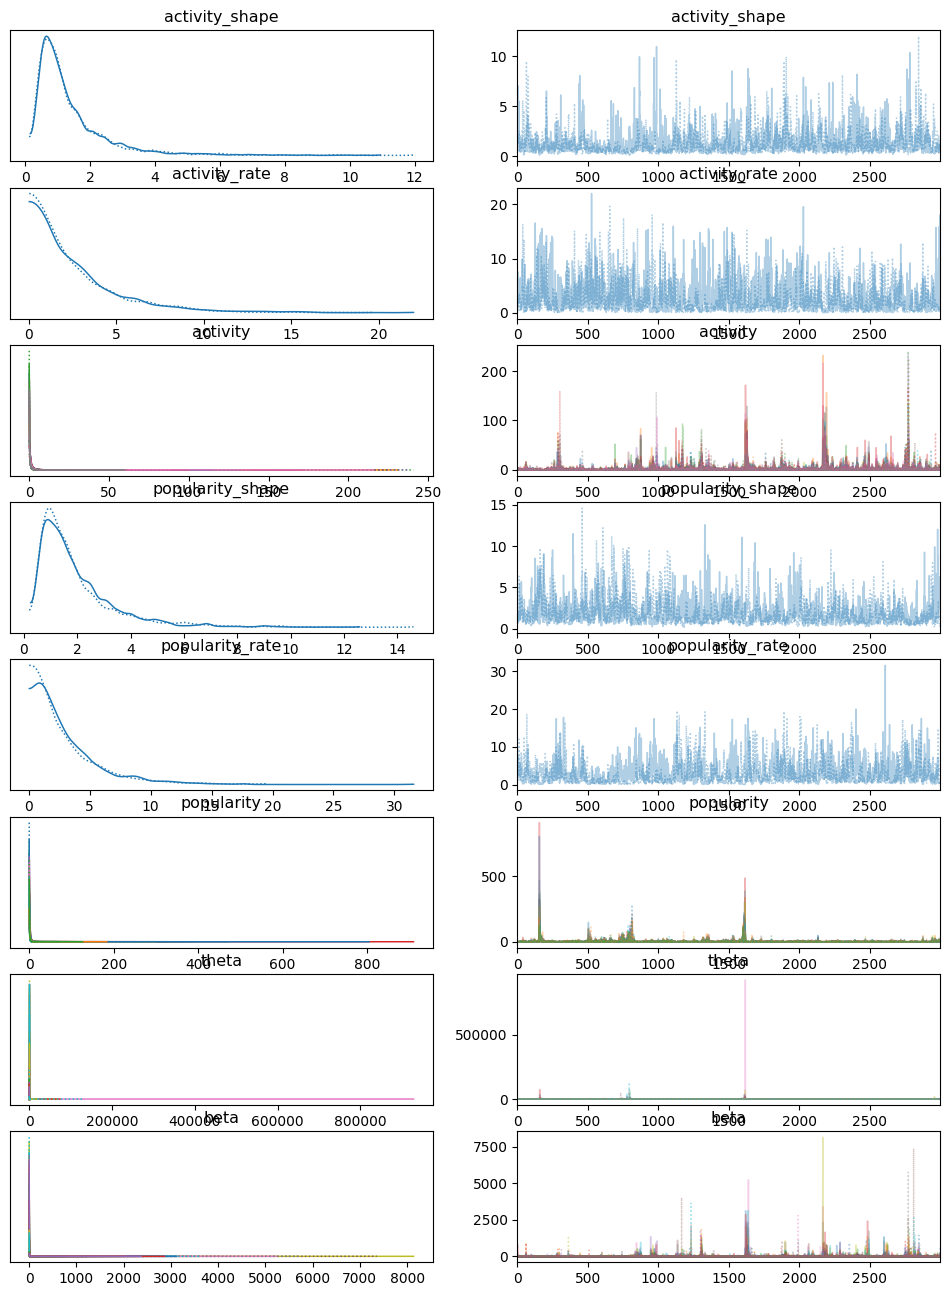

In [ ]:
with model:
    az.plot_trace(trace)
    summary = az.summary(trace)
    print(summary)


Increase number of iterations

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix
import pymc as pm
# Assuming you have a pandas DataFrame 'df' loaded from your dataset with columns 'User-ID', 'ISBN', and 'Book-Rating'.

# Convert the 'User-ID' and 'ISBN' to categorical data type to ensure we have a consistent way of referring to users and items.
df['User-ID'] = df['User-ID'].astype('category')
df['ISBN'] = df['ISBN'].astype('category')

# Create a lookup table to convert user IDs and ISBNs to integer indices.
user_id_lookup = {category: index for index, category in enumerate(df['User-ID'].cat.categories)}
isbn_lookup = {category: index for index, category in enumerate(df['ISBN'].cat.categories)}

n_users = len(user_id_lookup)
n_items = len(isbn_lookup)
n_factors = 5  # Number of latent factors

# Map the user IDs and ISBNs to their respective indices.
df['user_index'] = df['User-ID'].map(user_id_lookup)
df['item_index'] = df['ISBN'].map(isbn_lookup)

# Create the user-item matrix as a sparse matrix to save memory.
user_item_matrix = coo_matrix((df['Book-Rating'], (df['user_index'], df['item_index'])),
                              shape=(len(user_id_lookup), len(isbn_lookup)))
# Convert the COO matrix to CSR format for fast row slicing
user_item_csr = user_item_matrix.tocsr()
# Define hyperparameters
a_prime, b_prime = 0.3, 0.3  # Hyperparameters for the user activity level (shape and rate)
c_prime, d_prime = 0.3, 0.3  # Hyperparameters for the item popularity (shape and rate)
a, b = 0.3, 0.3  # Hyperparameters for the user preference (shape and additional rate)
c, d = 0.3, 0.3  # Hyperparameters for the item attribute (shape and additional rate)

n_components = 5  # Number of components (factors) in the model

# Extract the row and column indices for the non-zero entries
non_zero_indices = user_item_csr.nonzero()
rows, cols = non_zero_indices

# Convert the CSR matrix back to COO format for easy indexing
user_item_coo = user_item_csr.tocoo()

# Extract the row and column indices for the non-zero entries
rows, cols = user_item_coo.row, user_item_coo.col

# Ensure consistent lengths
print(f"Length of rows, cols, and data: {len(rows)}, {len(cols)}, {len(user_item_coo.data)}")

with pm.Model() as model:
     # User activity level
    activity_shape = pm.Gamma('activity_shape', alpha=a_prime, beta=b_prime)
    activity_rate = pm.Gamma('activity_rate', alpha=a_prime, beta=b_prime)
    activity = pm.Gamma('activity', alpha=activity_shape, beta=activity_rate, shape=len(user_id_lookup))

    # Item popularity
    popularity_shape = pm.Gamma('popularity_shape', alpha=c_prime, beta=d_prime)
    popularity_rate = pm.Gamma('popularity_rate', alpha=c_prime, beta=d_prime)
    popularity = pm.Gamma('popularity', alpha=popularity_shape, beta=popularity_rate, shape=len(isbn_lookup))

    # User preferences and item attributes
    theta = pm.Gamma('theta', alpha=a, beta=activity[:, None], shape=(len(user_id_lookup), n_components))
    beta = pm.Gamma('beta', alpha=c, beta=popularity[:, None], shape=(len(isbn_lookup), n_components))
     # Expected rate for Poisson distribution
    rate = pm.math.dot(theta, beta.T)

    # Manually check dimensions
    print(f"Theta shape: {theta.shape}")
    print(f"Beta shape: {beta.shape}")
    print(f"Expected rate matrix shape: {(n_users, n_items)}")
    print(f"Length of observed data: {len(user_item_csr.data)}")
    print(f"Length of rows and cols: {len(rows)}, {len(cols)}")


    # Flatten the rate matrix to use only the non-zero entries
    rate_flat = rate[rows, cols]

    # Define the observed ratings
    observed_ratings = pm.Poisson('observed_ratings', mu=rate_flat, observed=user_item_coo.data)

# Fit the model using MCMC
with model:
    trace = pm.sample(3000, tune=500, step=pm.NUTS(target_accept=0.95))


Length of rows, cols, and data: 68, 68, 68
Theta shape: Shape.0
Beta shape: Shape.0
Expected rate matrix shape: (18, 23)
Length of observed data: 68
Length of rows and cols: 68, 68


Increase number the Tuning Iterations

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix
import pymc as pm
# Assuming you have a pandas DataFrame 'df' loaded from your dataset with columns 'User-ID', 'ISBN', and 'Book-Rating'.

# Convert the 'User-ID' and 'ISBN' to categorical data type to ensure we have a consistent way of referring to users and items.
df['User-ID'] = df['User-ID'].astype('category')
df['ISBN'] = df['ISBN'].astype('category')

# Create a lookup table to convert user IDs and ISBNs to integer indices.
user_id_lookup = {category: index for index, category in enumerate(df['User-ID'].cat.categories)}
isbn_lookup = {category: index for index, category in enumerate(df['ISBN'].cat.categories)}

n_users = len(user_id_lookup)
n_items = len(isbn_lookup)
n_factors = 5  # Number of latent factors

# Map the user IDs and ISBNs to their respective indices.
df['user_index'] = df['User-ID'].map(user_id_lookup)
df['item_index'] = df['ISBN'].map(isbn_lookup)

# Create the user-item matrix as a sparse matrix to save memory.
user_item_matrix = coo_matrix((df['Book-Rating'], (df['user_index'], df['item_index'])),
                              shape=(len(user_id_lookup), len(isbn_lookup)))
# Convert the COO matrix to CSR format for fast row slicing
user_item_csr = user_item_matrix.tocsr()
# Define hyperparameters
a_prime, b_prime = 0.3, 0.3  # Hyperparameters for the user activity level (shape and rate)
c_prime, d_prime = 0.3, 0.3  # Hyperparameters for the item popularity (shape and rate)
a, b = 0.3, 0.3  # Hyperparameters for the user preference (shape and additional rate)
c, d = 0.3, 0.3  # Hyperparameters for the item attribute (shape and additional rate)

n_components = 5  # Number of components (factors) in the model

# Extract the row and column indices for the non-zero entries
non_zero_indices = user_item_csr.nonzero()
rows, cols = non_zero_indices

# Convert the CSR matrix back to COO format for easy indexing
user_item_coo = user_item_csr.tocoo()

# Extract the row and column indices for the non-zero entries
rows, cols = user_item_coo.row, user_item_coo.col

# Ensure consistent lengths
print(f"Length of rows, cols, and data: {len(rows)}, {len(cols)}, {len(user_item_coo.data)}")

with pm.Model() as model:
     # User activity level
    activity_shape = pm.Gamma('activity_shape', alpha=a_prime, beta=b_prime)
    activity_rate = pm.Gamma('activity_rate', alpha=a_prime, beta=b_prime)
    activity = pm.Gamma('activity', alpha=activity_shape, beta=activity_rate, shape=len(user_id_lookup))

    # Item popularity
    popularity_shape = pm.Gamma('popularity_shape', alpha=c_prime, beta=d_prime)
    popularity_rate = pm.Gamma('popularity_rate', alpha=c_prime, beta=d_prime)
    popularity = pm.Gamma('popularity', alpha=popularity_shape, beta=popularity_rate, shape=len(isbn_lookup))

    # User preferences and item attributes
    theta = pm.Gamma('theta', alpha=a, beta=activity[:, None], shape=(len(user_id_lookup), n_components))
    beta = pm.Gamma('beta', alpha=c, beta=popularity[:, None], shape=(len(isbn_lookup), n_components))
     # Expected rate for Poisson distribution
    rate = pm.math.dot(theta, beta.T)

    # Manually check dimensions
    print(f"Theta shape: {theta.shape}")
    print(f"Beta shape: {beta.shape}")
    print(f"Expected rate matrix shape: {(n_users, n_items)}")
    print(f"Length of observed data: {len(user_item_csr.data)}")
    print(f"Length of rows and cols: {len(rows)}, {len(cols)}")


    # Flatten the rate matrix to use only the non-zero entries
    rate_flat = rate[rows, cols]

    # Define the observed ratings
    observed_ratings = pm.Poisson('observed_ratings', mu=rate_flat, observed=user_item_coo.data)

# Fit the model using MCMC
with model:
    trace = pm.sample(3000, tune=800, step=pm.NUTS(target_accept=0.95),return_inferencedata=True)


Length of rows, cols, and data: 68, 68, 68
Theta shape: Shape.0
Beta shape: Shape.0
Expected rate matrix shape: (18, 23)
Length of observed data: 68
Length of rows and cols: 68, 68


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (500) in plot_autocorr, generating only 40 plots
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://num

<Axes: >

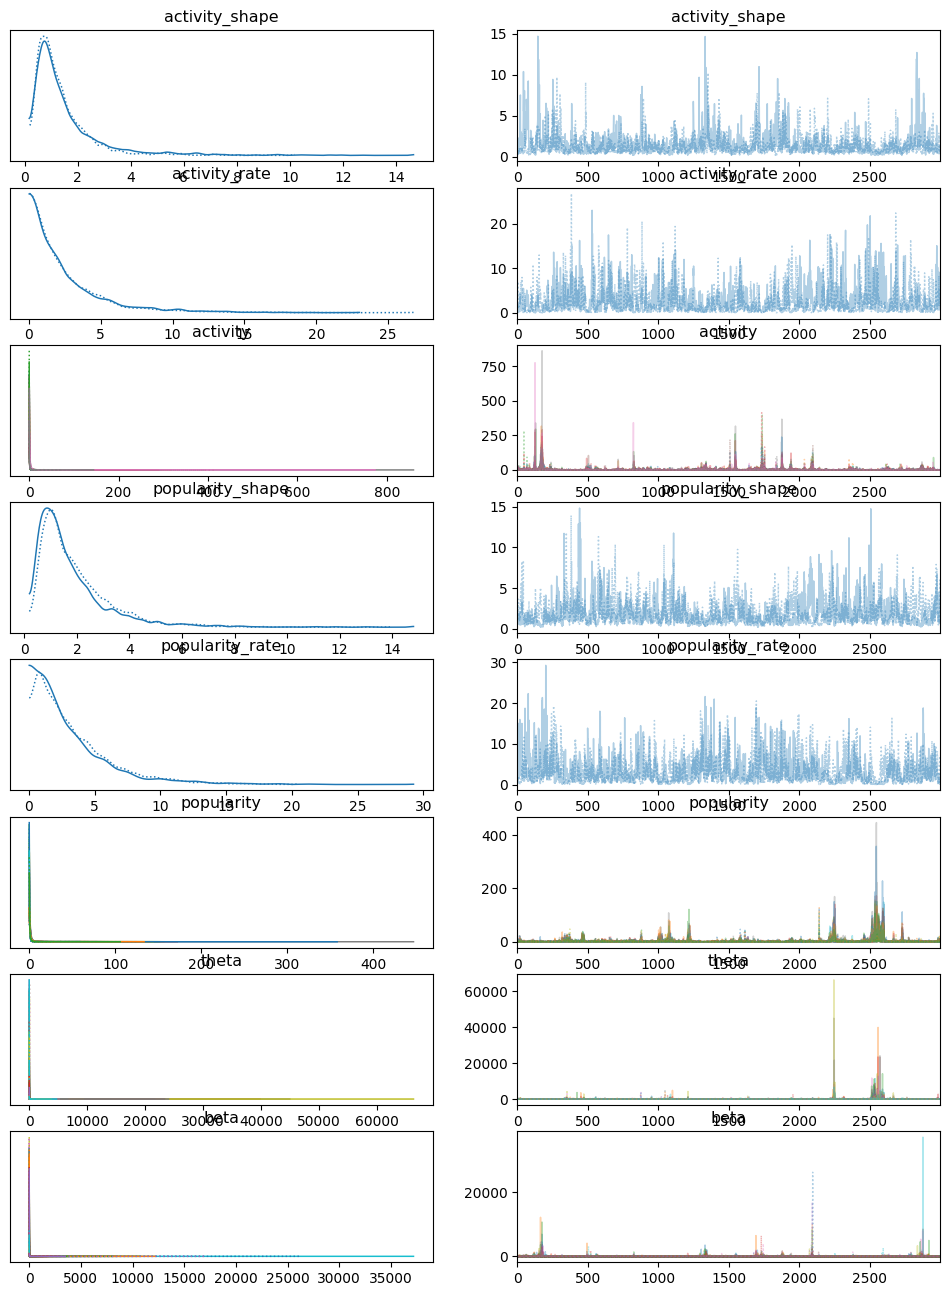

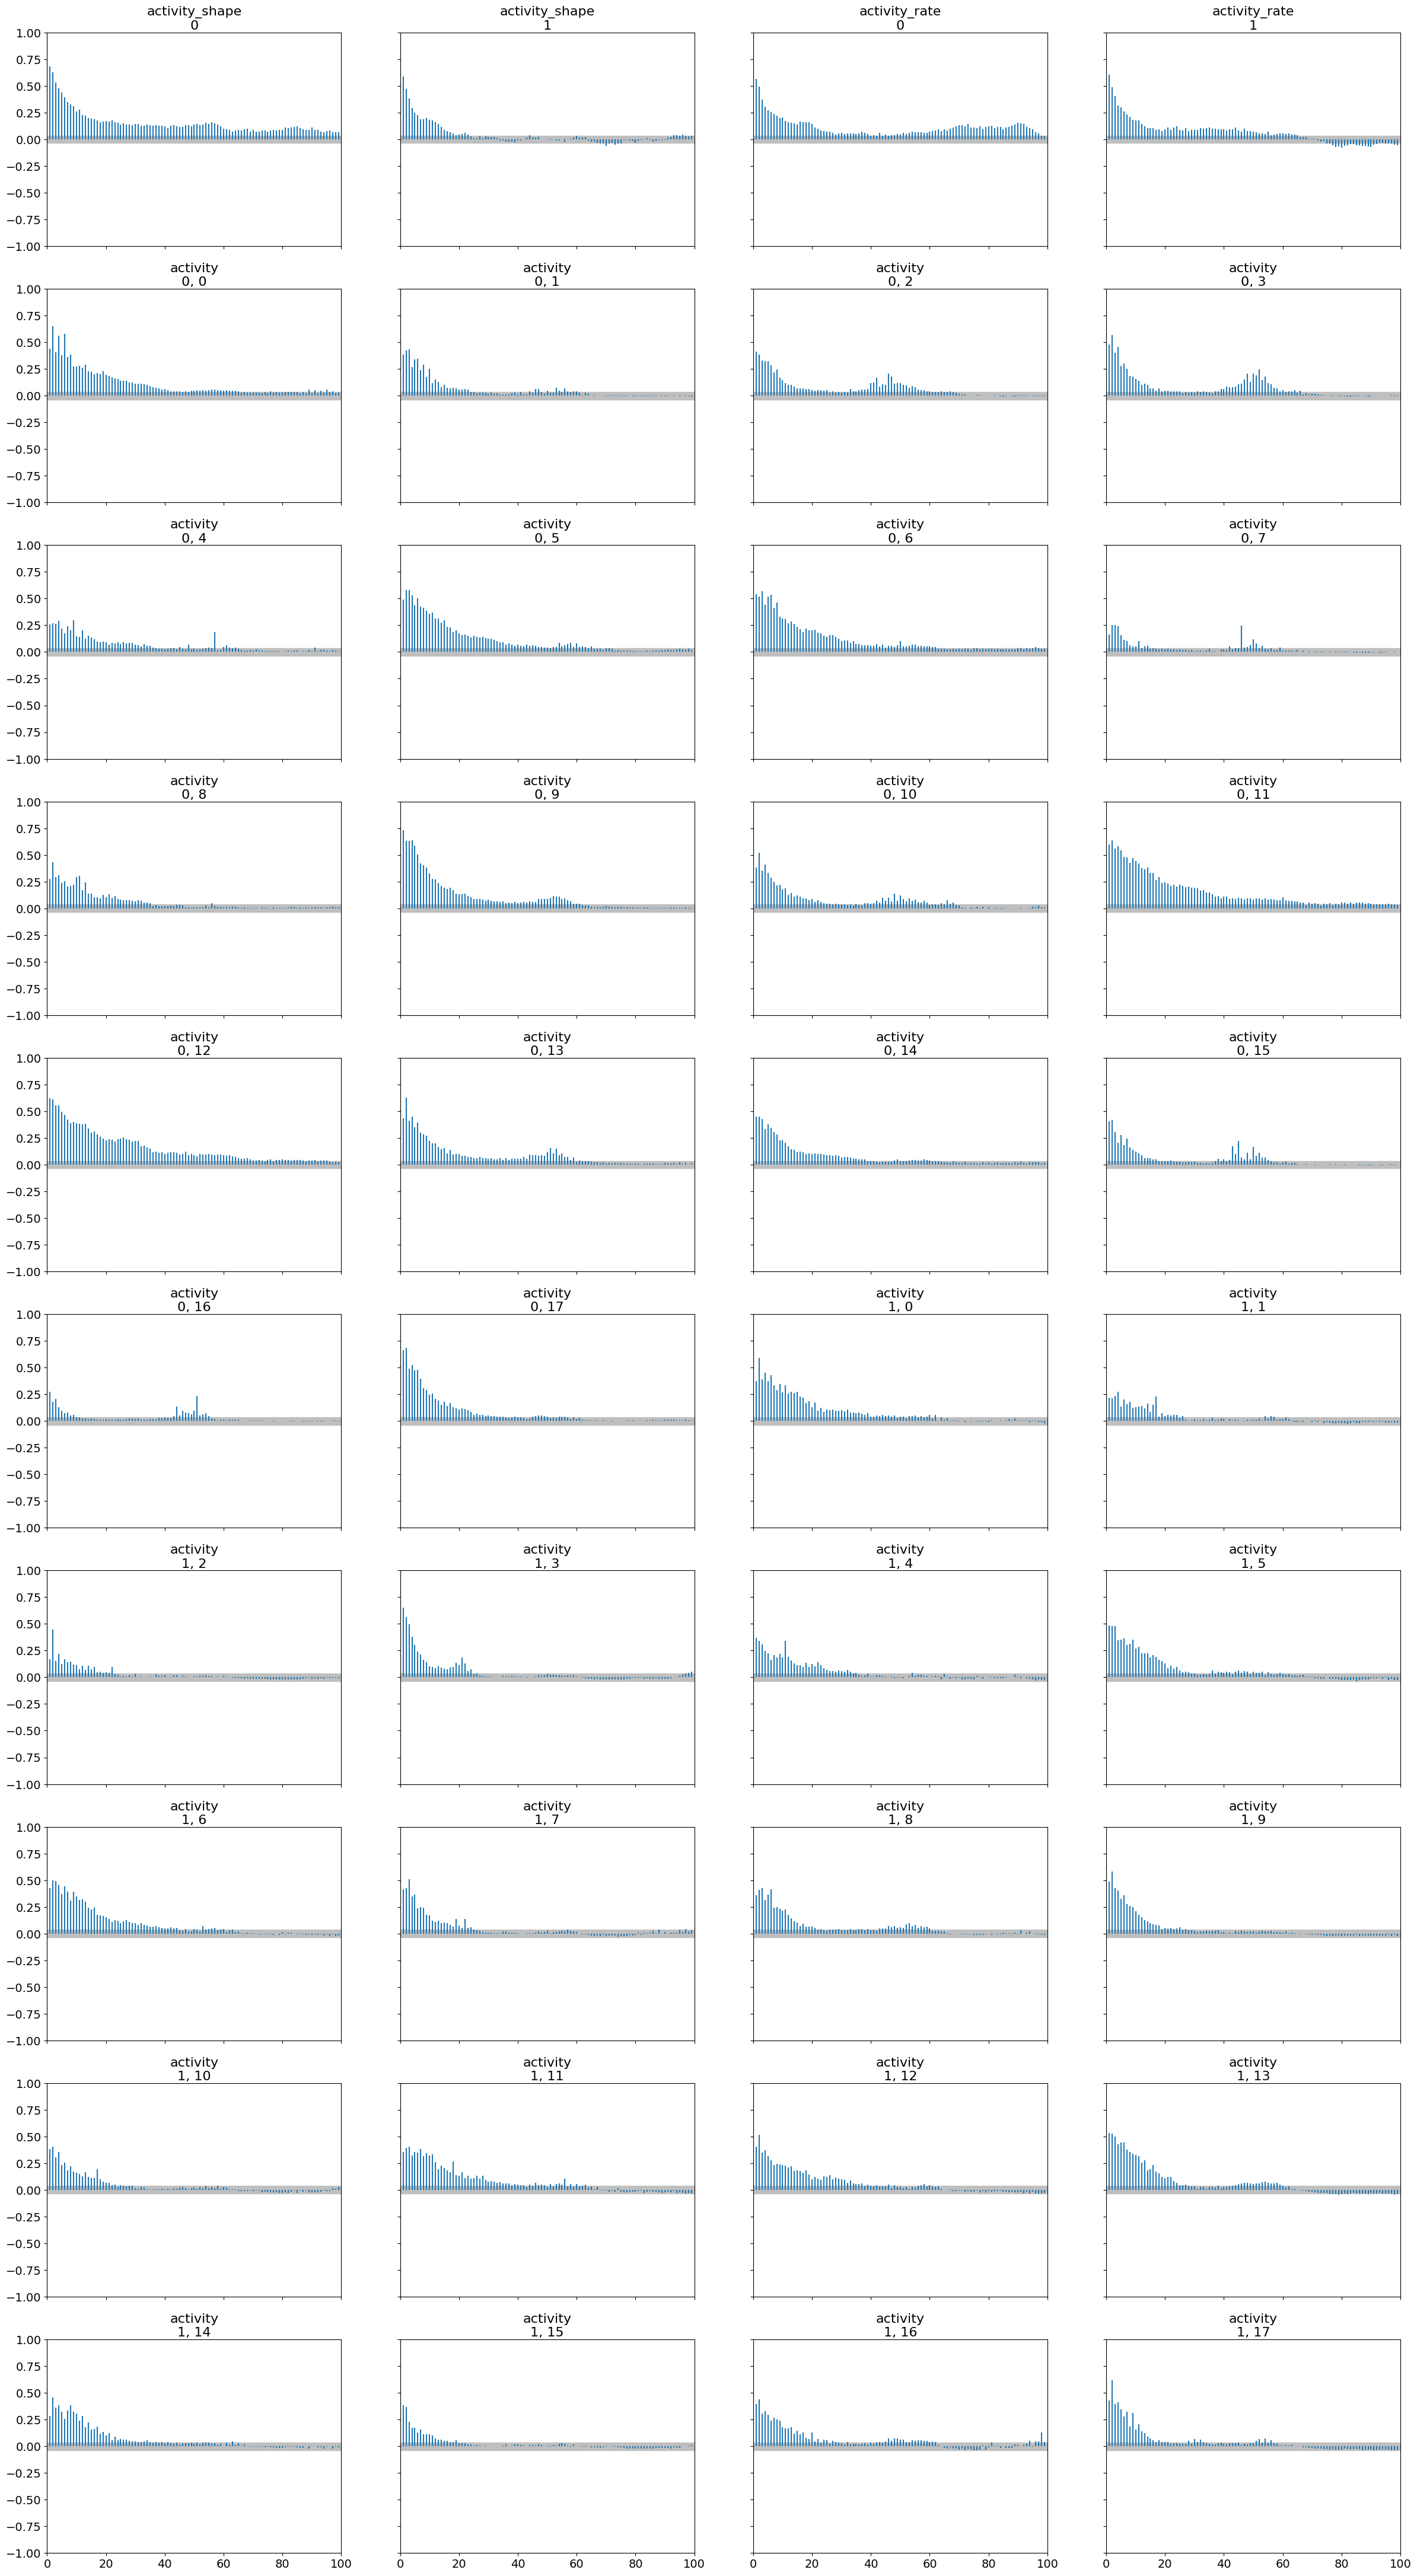

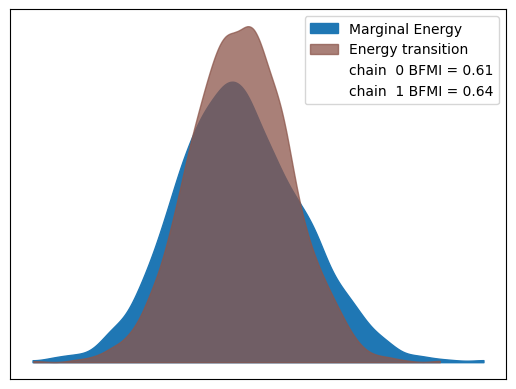

In [ ]:
import arviz as az

az.plot_trace(trace)
az.plot_autocorr(trace)
az.plot_energy(trace)

Number of divergent transitions: 0


/usr/local/lib/python3.10/dist-packages/arviz/plots/backends/matplotlib/pairplot.py:232: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


                 mean      sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
activity_shape  1.304   1.099     0.145      3.355      0.065    0.046   
activity_rate   2.676   2.777     0.002      8.168      0.138    0.098   
activity[0]     0.425   0.826     0.000      1.702      0.054    0.038   
activity[1]     2.098  14.131     0.000      6.549      0.345    0.244   
activity[2]     2.464   8.694     0.002      7.892      0.296    0.209   
...               ...     ...       ...        ...        ...      ...   
beta[22, 0]     5.331  45.095     0.000     16.148      0.755    0.534   
beta[22, 1]     4.147  24.928     0.000     14.787      0.581    0.411   
beta[22, 2]     4.272  28.006     0.000     14.328      0.543    0.384   
beta[22, 3]     4.995  41.121     0.000     15.422      1.075    0.760   
beta[22, 4]     4.289  31.291     0.000     13.829      0.740    0.523   

                ess_bulk  ess_tail  r_hat  
activity_shape     238.0     668.0   1.02  
activity_rate      331.

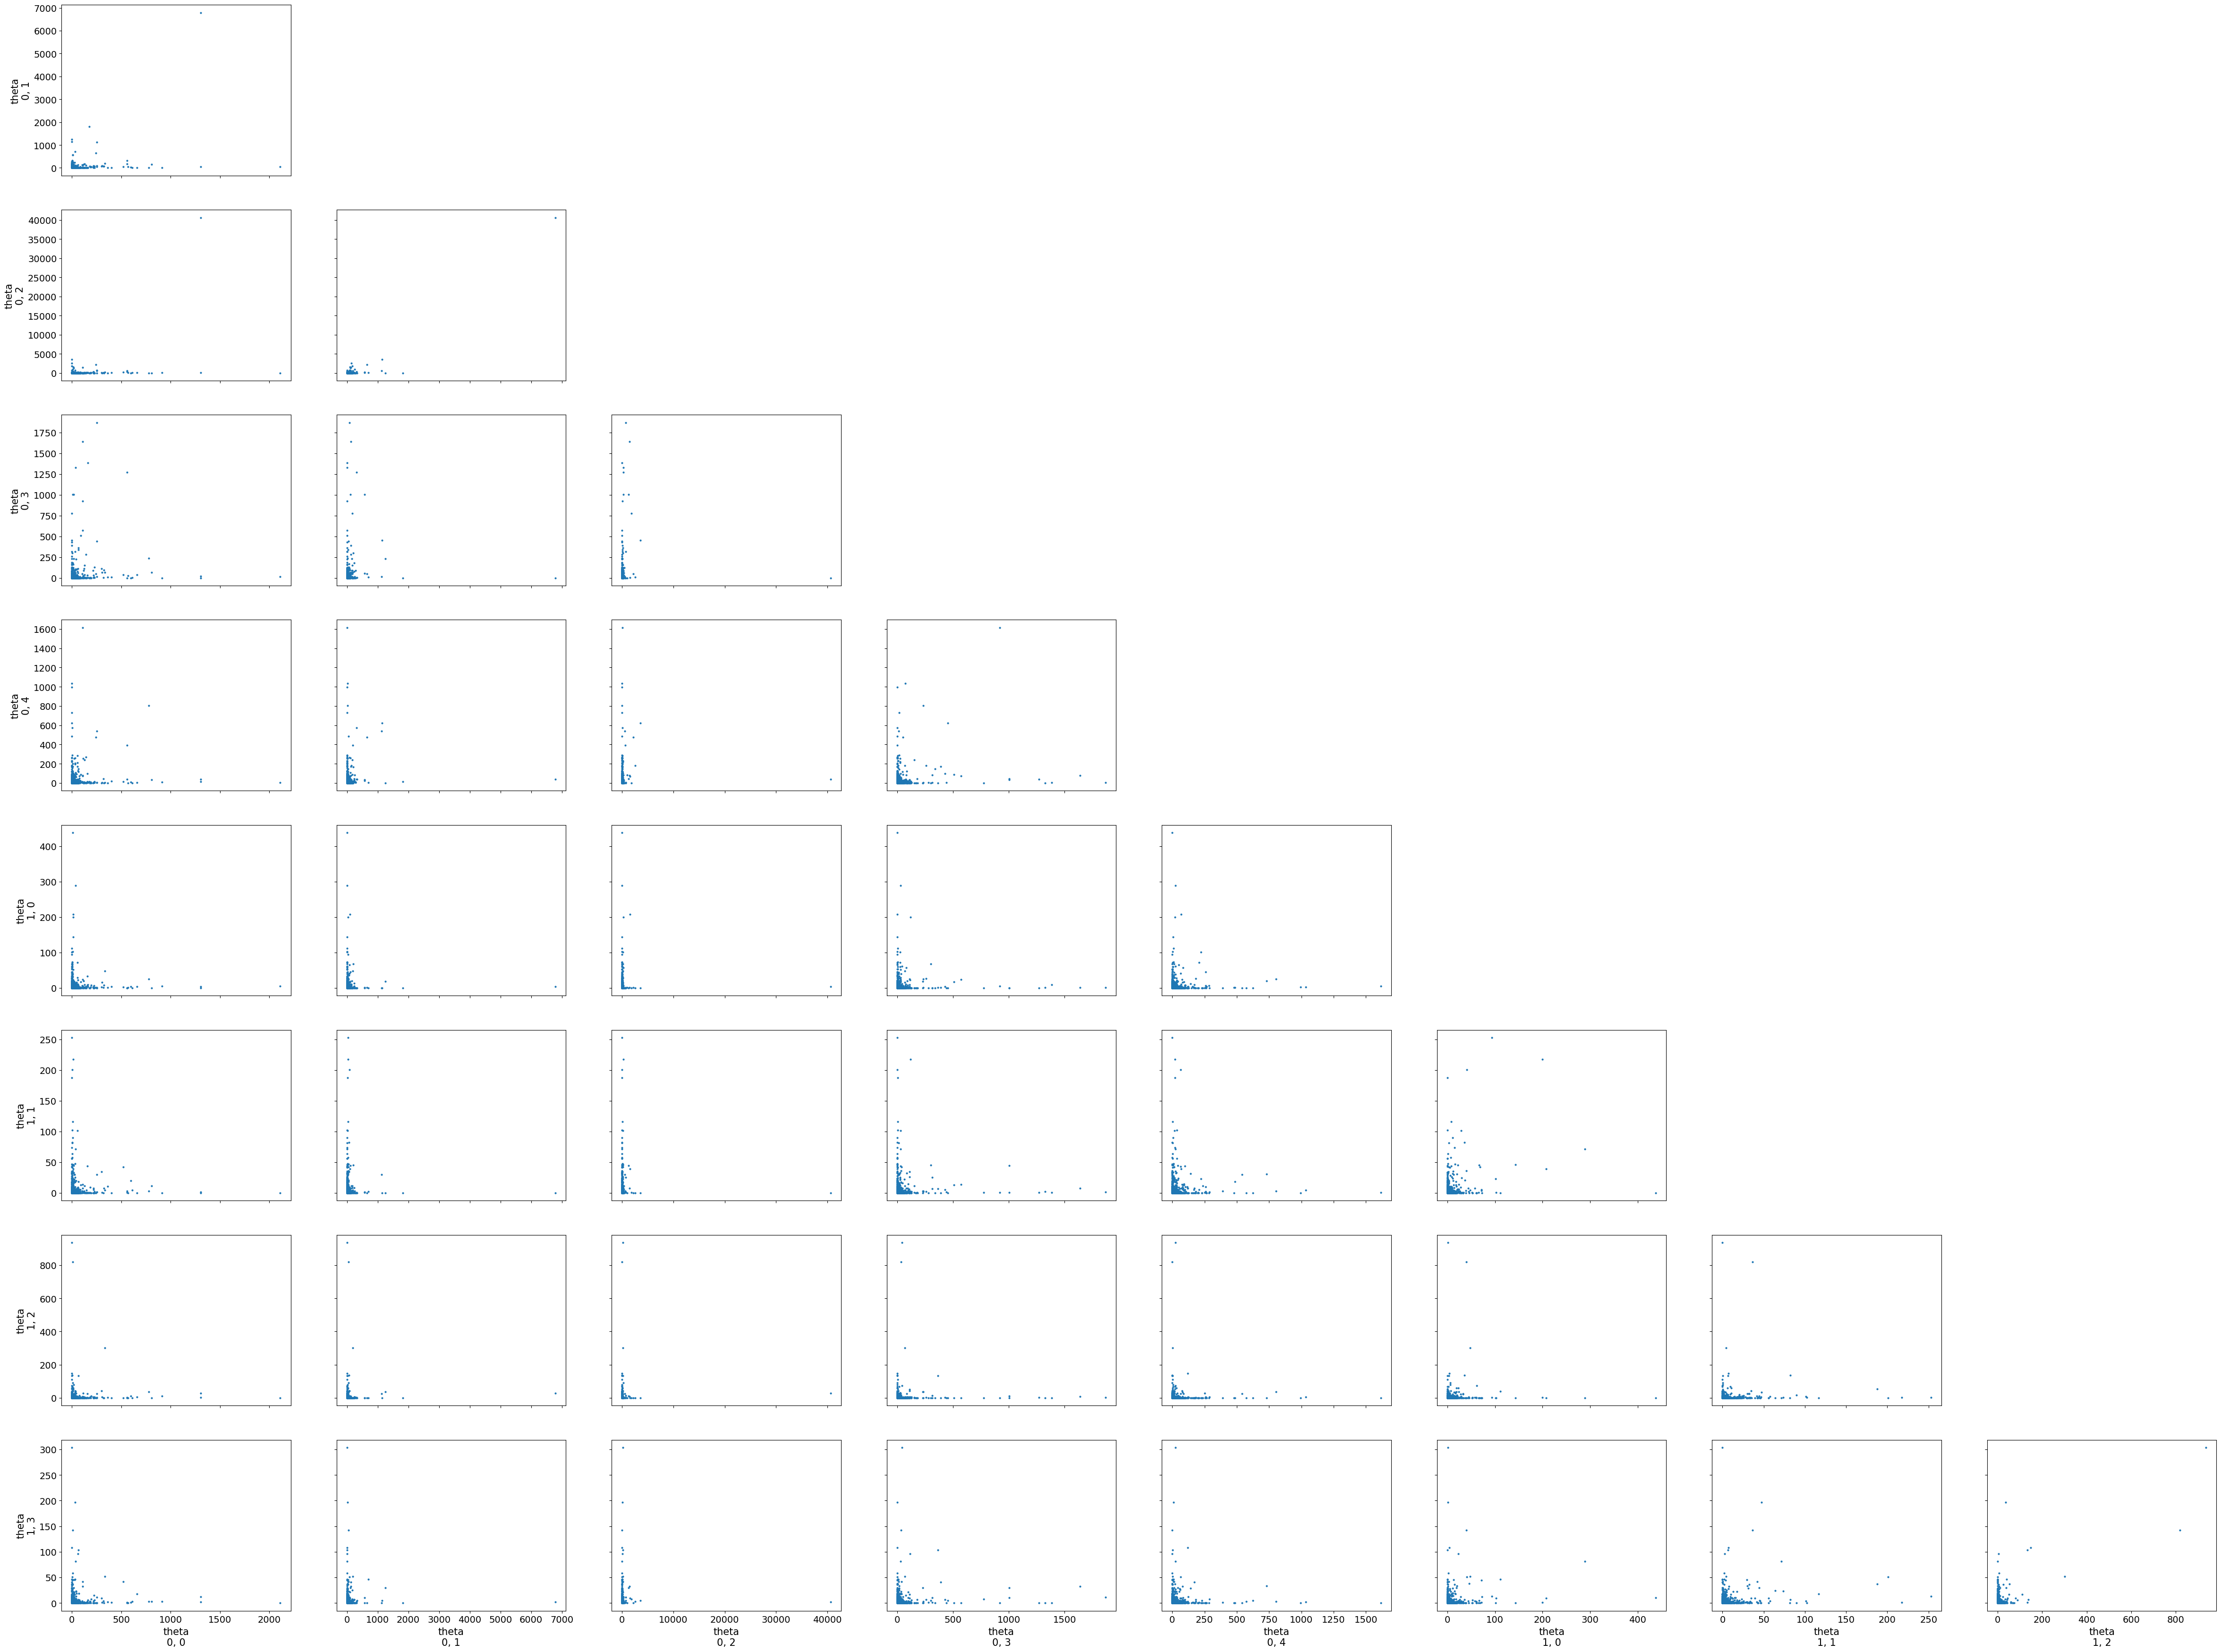

In [ ]:
# Import necessary libraries
import arviz as az

# Assuming 'trace' is the InferenceData object returned by pm.sample
# Extract the sampler stats
sampler_stats = trace.sample_stats

# Check for divergences
divergent = sampler_stats['diverging']
print("Number of divergent transitions:", divergent.sum().item())

# If you want to plot where divergences occurred
az.plot_pair(
    trace,
    var_names=["theta", "beta"],
    kind='scatter',
    divergences=True
)

# Summary with R-hat for convergence diagnostics
summary = az.summary(trace, hdi_prob=0.95)
print(summary)


                 mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
activity_shape  1.231   1.023   0.164    2.965      0.052    0.037     229.0   
activity_rate   2.908   2.894   0.005    8.151      0.135    0.096     325.0   
activity[0]     0.375   0.999   0.000    1.166      0.055    0.039     121.0   
activity[1]     1.453   4.340   0.001    4.359      0.188    0.133     216.0   
activity[2]     1.989   6.995   0.003    5.878      0.286    0.203     197.0   
...               ...     ...     ...      ...        ...      ...       ...   
beta[22, 0]     4.524  41.962   0.000    9.776      0.852    0.602     492.0   
beta[22, 1]     4.694  46.723   0.000    9.406      1.348    0.954     464.0   
beta[22, 2]     5.578  69.899   0.000    9.617      1.916    1.355     495.0   
beta[22, 3]     5.519  59.804   0.000   10.431      1.270    0.898     423.0   
beta[22, 4]     4.975  63.786   0.000   10.185      1.171    0.828     448.0   

                ess_tail  r_hat  
activ

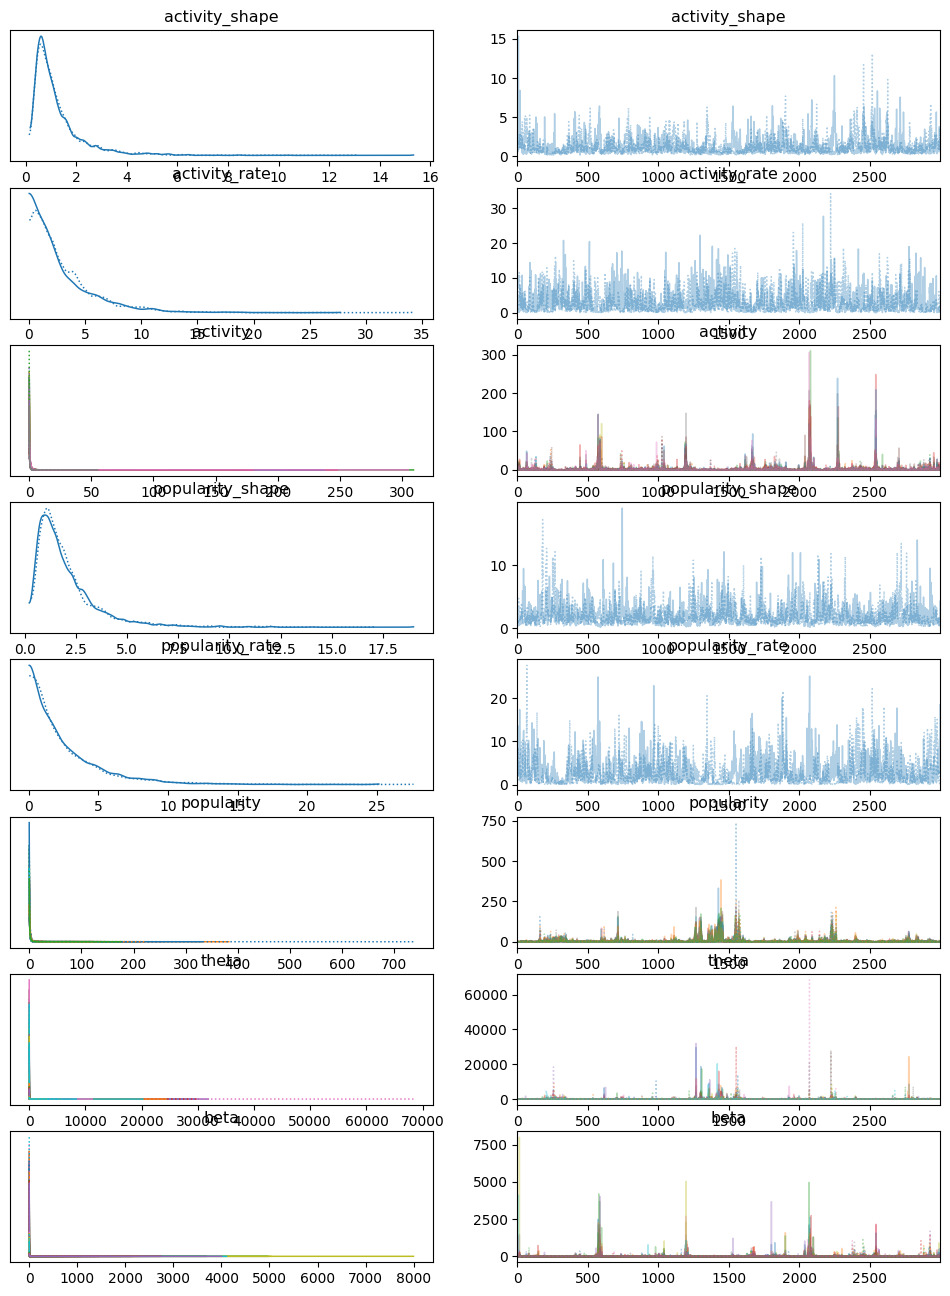

In [ ]:
with model:
    az.plot_trace(trace)
    summary = az.summary(trace)
    print(summary)


Posterior Predictive checking

In [ ]:
with model:
    ppc = pm.sample_posterior_predictive(trace, var_names=['observed_ratings'])

In [ ]:
print(ppc.posterior_predictive)


<xarray.Dataset>
Dimensions:                 (chain: 2, draw: 3000, observed_ratings_dim_2: 68)
Coordinates:
  * chain                   (chain) int64 0 1
  * draw                    (draw) int64 0 1 2 3 4 ... 2995 2996 2997 2998 2999
  * observed_ratings_dim_2  (observed_ratings_dim_2) int64 0 1 2 3 ... 65 66 67
Data variables:
    observed_ratings        (chain, draw, observed_ratings_dim_2) int64 3 ... 2
Attributes:
    created_at:                 2024-01-30T19:15:41.651843
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.7.2


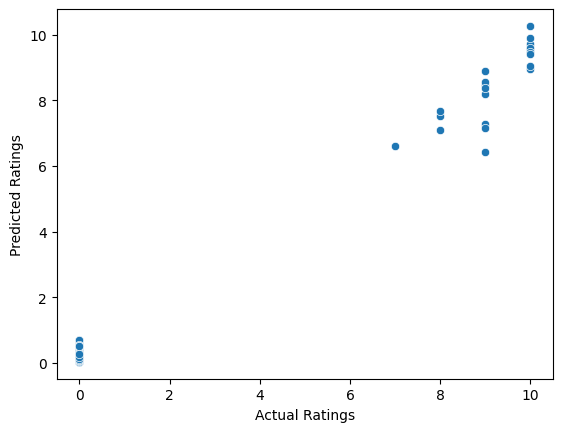

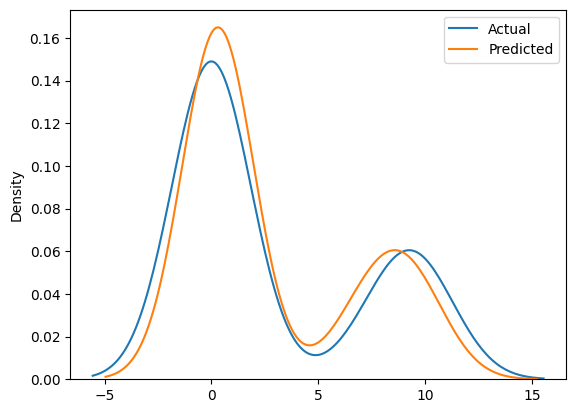

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the posterior predictive samples for 'observed_ratings'
predicted_ratings = ppc.posterior_predictive["observed_ratings"].mean(dim=["chain", "draw"]).values
# Accessing the 'observed_ratings' data
predicted_ratings_data = ppc["posterior_predictive"]["observed_ratings"]

# Computing the mean predicted ratings
predicted_ratings= predicted_ratings_data.mean(dim=["chain", "draw"]).values

# Assuming 'user_item_coo.data' contains your actual ratings
actual_ratings = user_item_coo.data

sns.scatterplot(x=actual_ratings, y=predicted_ratings)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

sns.kdeplot(actual_ratings, label='Actual')
sns.kdeplot(predicted_ratings, label='Predicted')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(actual_ratings, predicted_ratings, squared=False)
mae = mean_absolute_error(actual_ratings, predicted_ratings)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 0.6066044826458282
MAE: 0.43822549019607837


In [ ]:
import arviz as az

# Convert the trace to an inference data object
inference_data = az.convert_to_inference_data(obj=trace)

# Convert the inference data to a DataFrame
trace_df = inference_data.to_dataframe(include_coords=False, groups="posterior")

In [ ]:
# Filter columns for theta and beta
theta_columns = [col for col in trace_df.columns if 'theta[' in col]
beta_columns = [col for col in trace_df.columns if 'beta[' in col]

# Reshape theta and beta into matrices
theta_matrix = trace_df[theta_columns].mean().values.reshape(n_users, n_factors)
beta_matrix = trace_df[beta_columns].mean().values.reshape(n_items, n_factors)


# Predict ratings
predicted_ratings = np.dot(theta_matrix, beta_matrix.T)

# Generate recommendations
recommendations = {}
for user_id in user_id_lookup:
    user_index = user_id_lookup[user_id]

    # Get the user's predicted ratings and already rated items
    user_ratings = predicted_ratings[user_index]
    rated_items = set(user_item_csr[user_index].nonzero()[1])

    # Recommendations are items with the highest predicted ratings that haven't been rated yet
    user_recommendations = [isbn for isbn, rating in sorted(enumerate(user_ratings), key=lambda x: x[1], reverse=True) if isbn not in rated_items]

    recommendations[user_id] = user_recommendations[:5]  # Top 5 recommendations

# Print recommendations for a specific user (replace USER_ID with an actual user ID)
print("Recommendations for User-ID ", recommendations[126680])


Recommendations for User-ID USER_ID: [1, 15, 6, 11, 12]


In [ ]:
# Generate recommendations for Book-Titles
book_title_recommendations = {}
for user_id in user_id_lookup:
    user_index = user_id_lookup[user_id]

    # Get the user's predicted ratings and already rated items
    user_ratings = predicted_ratings[user_index]
    rated_items = set(user_item_csr[user_index].nonzero()[1])

    # Recommendations are items with the highest predicted ratings that haven't been rated yet
    user_recommendations = [isbn for isbn, rating in sorted(enumerate(user_ratings), key=lambda x: x[1], reverse=True) if isbn not in rated_items]

    # Map ISBNs to Book-Titles
    book_title_recommendations[user_id] = [df[df['ISBN'].cat.codes == isbn]['Book-Title'].values[0] if isbn in df['ISBN'].cat.codes.values else 'Title not found' for isbn in user_recommendations[:5]]  # Top 5 recommendations

# Print recommendations for a specific user (replace USER_ID with an actual user ID)
user_id_to_recommend = 126680  # Replace USER_ID with the desired user ID
print("Recommendations for User-ID", user_id_to_recommend, ":", book_title_recommendations[user_id_to_recommend])

Recommendations for User-ID 126680 : ['On the Road (Essential.penguin S.)', 'The Secret Life of Bees', 'The Nanny Diaries: A Novel', 'A Painted House', "Kristy's Great Idea (Baby-Sitters Club, 1)"]


In [ ]:
# List of user IDs for which you want to get recommendations
user_ids_to_recommend = [230522, 204864, 110973]  # Replace with your desired user IDs

# Generate recommendations for Book-Titles for each user in the list
for user_id_to_recommend in user_ids_to_recommend:
    if user_id_to_recommend in book_title_recommendations:
        recommendations = book_title_recommendations[user_id_to_recommend]
        print("Recommendations for User-ID", user_id_to_recommend, ":")
        for i, book_title in enumerate(recommendations, start=1):
            print(f"{i}. {book_title}")
    else:
        print("No recommendations found for User-ID", user_id_to_recommend)


Recommendations for User-ID 230522 :
1. On the Road (Essential.penguin S.)
2. The Secret Life of Bees
3. The Nanny Diaries: A Novel
4. Kristy's Great Idea (Baby-Sitters Club, 1)
5. A Painted House
Recommendations for User-ID 204864 :
1. On the Road (Essential.penguin S.)
2. The Secret Life of Bees
3. The Nanny Diaries: A Novel
4. A Painted House
5. Kristy's Great Idea (Baby-Sitters Club, 1)
Recommendations for User-ID 110973 :
1. On the Road (Essential.penguin S.)
2. The Secret Life of Bees
3. The Nanny Diaries: A Novel
4. A Painted House
5. Kristy's Great Idea (Baby-Sitters Club, 1)




---



---

